In [79]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [80]:
countydf = pd.read_csv("county_info_2016.csv")
droughtdf = pd.read_csv("us-droughts.csv")

In [81]:
countydf.head()

,USPS,GEOID,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001,161526,Autauga County,1.539609e+09,25749942,594.446,9.942,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4.117584e+09,1133130502,1589.808,437.504,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2.291819e+09,50864677,884.876,19.639,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1.612482e+09,9287974,622.583,3.586,33.015893,-87.127148
4,AL,1009,161530,Blount County,1.670042e+09,15077458,644.807,5.821,33.977358,-86.566440


In [82]:
droughtdf.head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID
0,2000-11-07,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1
1,2000-10-31,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1
2,2000-10-24,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1
3,2000-10-17,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1
4,2000-10-10,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1


In [83]:
list(countydf)

['USPS',
 'GEOID',
 'ANSICODE',
 'NAME',
 'ALAND',
 'AWATER',
 'ALAND_SQMI',
 'AWATER_SQMI',
 'INTPTLAT',
 'INTPTLONG                                                                                                               ']

In [84]:
countydf = countydf.rename(columns={"GEOID": "FIPS", "INTPTLAT": "LAT", 'INTPTLONG                                                                                                               ': "LONG"})

In [85]:
countydf = countydf.reindex()

In [86]:
countydf.head()

,USPS,FIPS,ANSICODE,NAME,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,LAT,LONG
0,AL,1001,161526,Autauga County,1.539609e+09,25749942,594.446,9.942,32.532237,-86.646440
1,AL,1003,161527,Baldwin County,4.117584e+09,1133130502,1589.808,437.504,30.659218,-87.746067
2,AL,1005,161528,Barbour County,2.291819e+09,50864677,884.876,19.639,31.870253,-85.405104
3,AL,1007,161529,Bibb County,1.612482e+09,9287974,622.583,3.586,33.015893,-87.127148
4,AL,1009,161530,Blount County,1.670042e+09,15077458,644.807,5.821,33.977358,-86.566440


In [87]:
countydfNew = countydf[['FIPS', 'LAT', "LONG"]]

In [88]:
result = pd.merge(droughtdf, countydfNew, on='FIPS')


In [89]:
result.head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID,LAT,LONG
0,2000-11-07,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1,55.245044,-161.997477
1,2000-10-31,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1,55.245044,-161.997477
2,2000-10-24,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1,55.245044,-161.997477
3,2000-10-17,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1,55.245044,-161.997477
4,2000-10-10,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1,55.245044,-161.997477


In [90]:
avg = result.groupby(['LAT', 'LONG']).mean().reset_index()

In [91]:
avg.head()

,LAT,LONG,FIPS,NONE,D0,D1,D2,D3,D4,domStatisticFormatID
0,17.948052,-66.922989,72055,81.112105,18.887895,1.814960,0.000000,0.000000,0.0,1
1,17.952922,-66.387588,72133,65.867520,34.132480,8.211763,2.732491,0.423663,0.0,1
2,17.971485,-66.262252,72123,62.494255,37.505745,13.308805,4.656587,3.159761,0.0,1
3,17.972060,-66.041945,72015,70.051445,29.948555,9.281650,4.187964,3.105370,0.0,1
4,17.973929,-66.137467,72057,65.604937,34.395063,12.767042,4.882002,3.285540,0.0,1


In [92]:
avg = avg[(avg['LAT'] >= 25) & (avg['LAT'] <= 51)]
avg = avg[(avg['LONG'] >= -150) & (avg['LONG'] <= -50)]

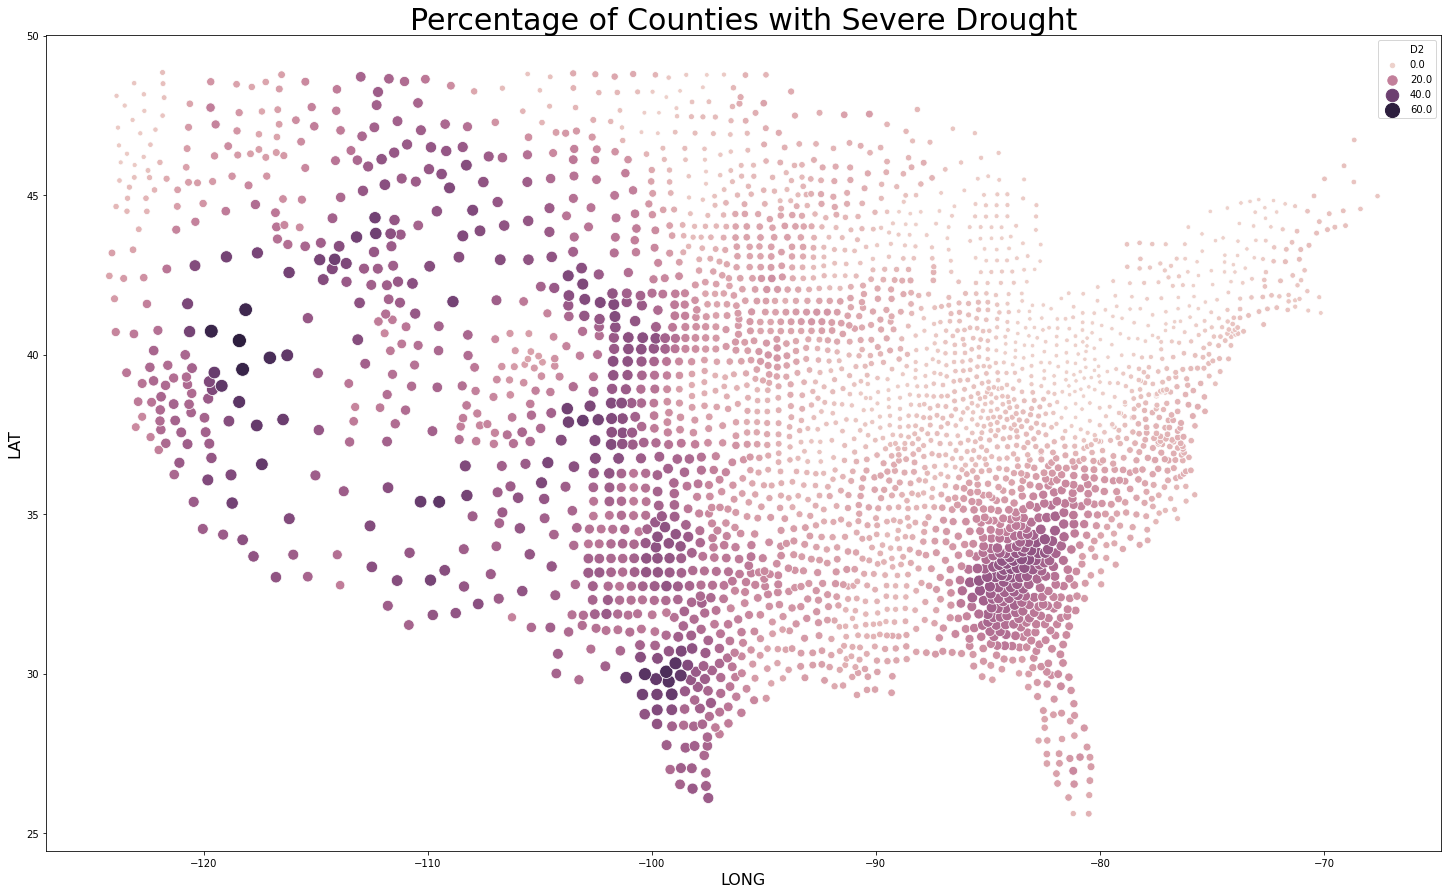

In [99]:
fig, ax = pyplot.subplots(figsize=(25,15))
ax.set_title('Percentage of Counties with Severe Drought', fontsize=30)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax = sns.scatterplot(ax=ax, x="LONG", y="LAT", size="D2", hue="D2",sizes=(20, 200), data=avg)

In [101]:
clmns = ['LONG', 'LAT','D2']
std = stats.zscore(avg[clmns])
kmeans = KMeans(n_clusters=5, random_state=0).fit(std)
labels = kmeans.labels_
avg['clusters'] = labels
clmns.extend(['clusters'])
avg[clmns].groupby(['clusters']).mean().head(10)

,LONG,LAT,D2
clusters,,,
0,-81.371602,39.602543,3.237860
1,-87.638072,33.411269,12.403514
2,-112.404697,42.520087,23.580866
3,-97.175145,33.237802,27.694217
4,-94.506614,43.005129,8.057308


Text(0.5, 0.98, 'Clusters')

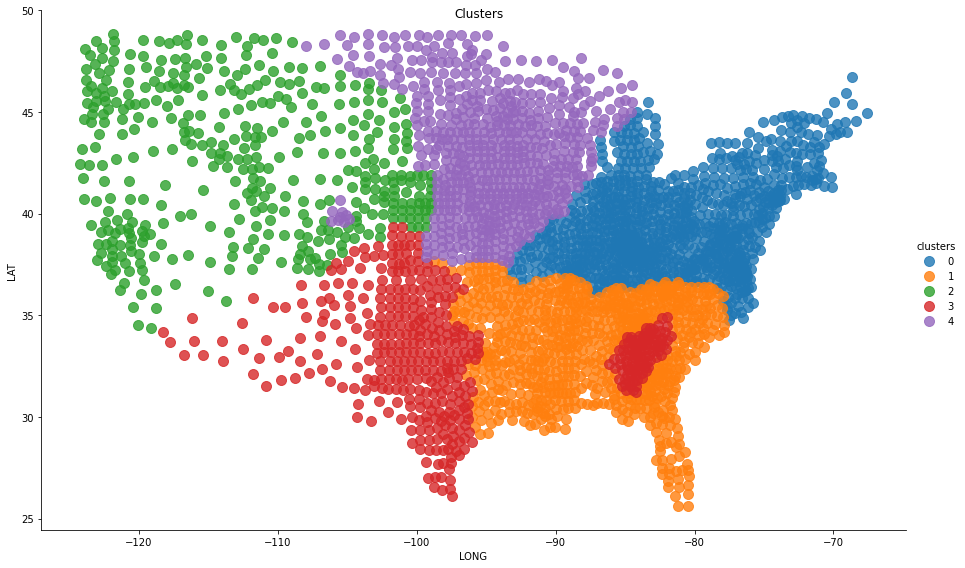

In [102]:
sns.lmplot('LONG', 'LAT', data=avg, fit_reg=False, hue="clusters", 
           scatter_kws={"marker": "D", "s": 100}, height=8, aspect=1.6).fig.suptitle("Clusters by location")

Text(0.5, 0.98, 'Clusters by Longitude and Drought Severity')

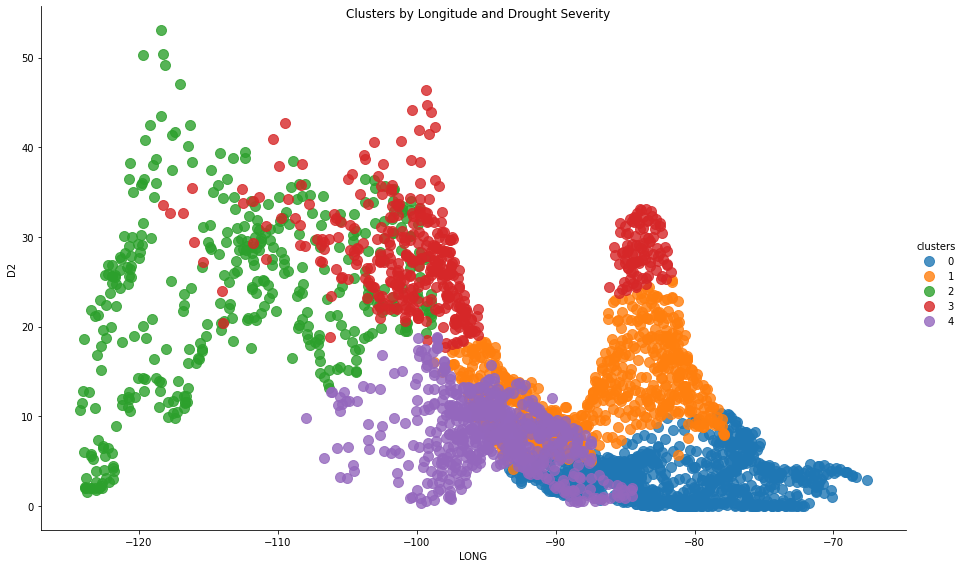

In [104]:
sns.lmplot('LONG', 'D2', data=avg, fit_reg=False, hue="clusters", 
           scatter_kws={"marker": "D", "s": 100}, size=8, aspect=1.6).fig.suptitle("Clusters by Longitude and Drought Severity")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Clusters by Drought Severity and Latitude')

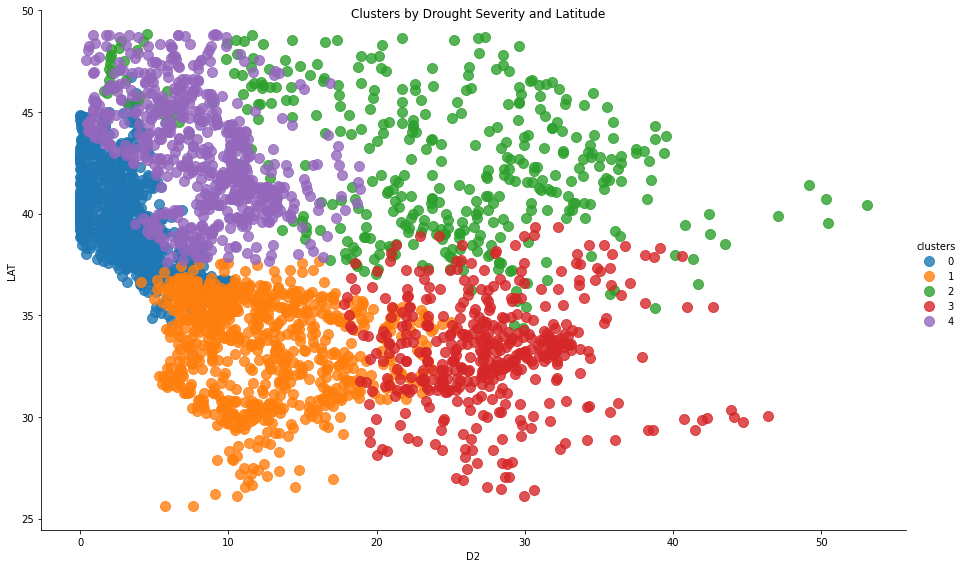

In [103]:
sns.lmplot('D2', 'LAT', data=avg, fit_reg=False, hue="clusters", 
           scatter_kws={"marker": "D", "s": 100}, size=8,
           aspect=1.6).fig.suptitle("Clusters by Drought Severity and Latitude")


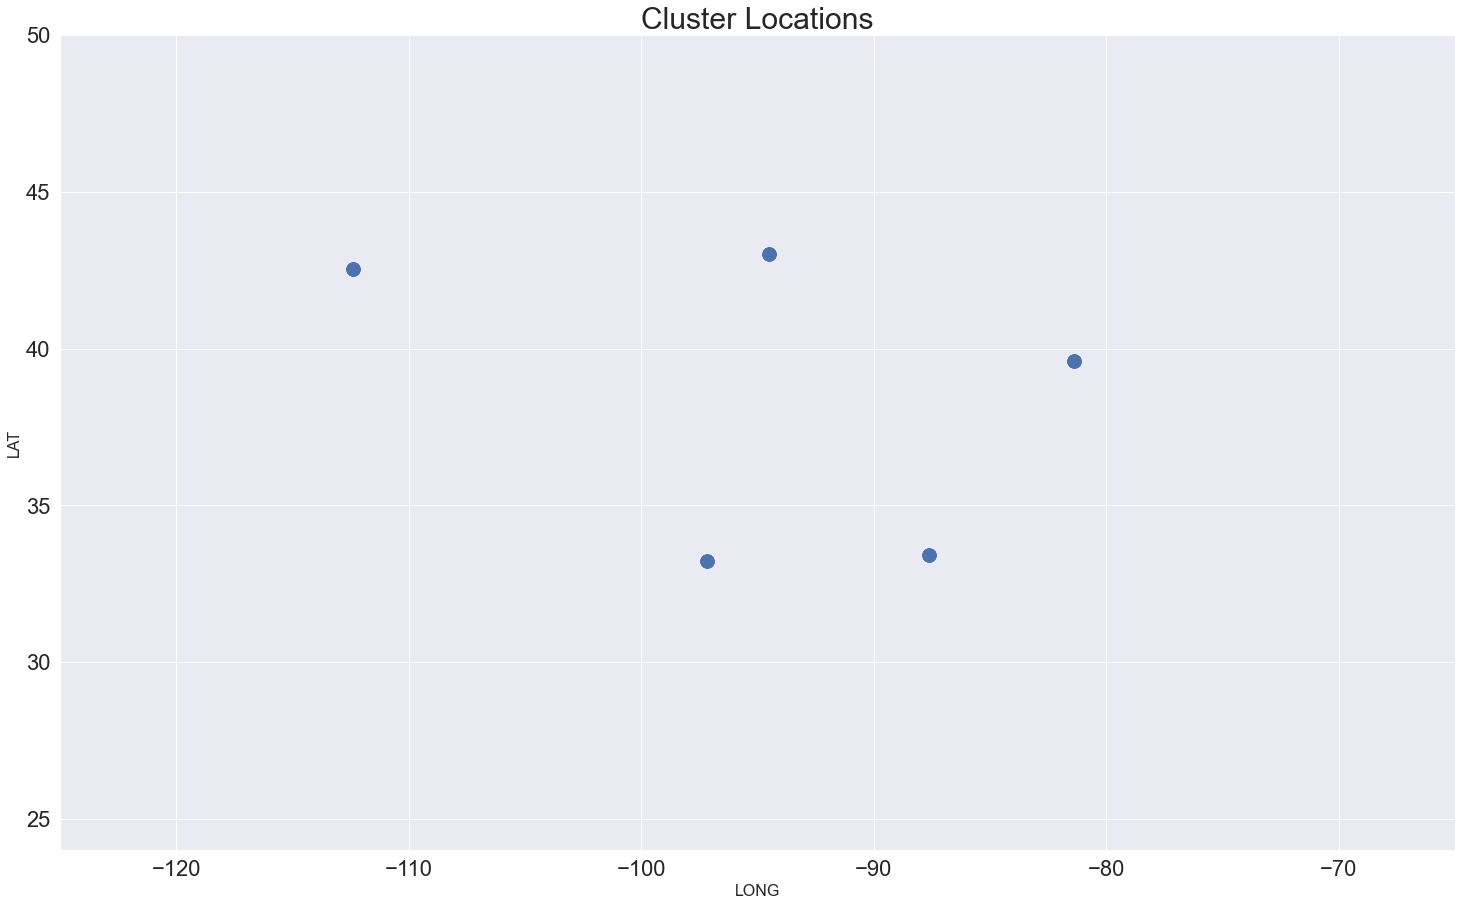

In [128]:
fig, ax = pyplot.subplots(figsize=(25,15))
ax.set_title('Cluster Locations', fontsize=30)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xlim(-125,-65)
ax.set_ylim(24,50)
sns.set(font_scale = 2)
pl = sns.scatterplot(x="LONG", y="LAT", data=avg[clmns].groupby(['clusters']).mean(), s=250)